In [2]:
import cv2, os, shutil
from glob import glob
import matplotlib.pyplot as plt

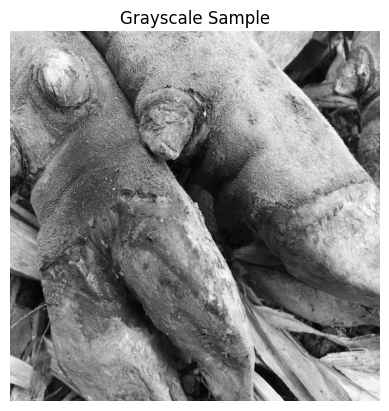

In [5]:
source_base = 'dataset'
grayscale_base = 'dataset_grayscale'

if os.path.exists(grayscale_base): shutil.rmtree(grayscale_base)
os.makedirs(grayscale_base, exist_ok=True)

for folder in ['train', 'val', 'test']:
    for label in os.listdir(os.path.join(source_base, folder)):
        src = os.path.join(source_base, folder, label)
        dst = os.path.join(grayscale_base, folder, label)
        os.makedirs(dst, exist_ok=True)
        for img in os.listdir(src):
            img_path = os.path.join(src, img)
            gray = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
            cv2.imwrite(os.path.join(dst, img), gray)

# Tampilkan contoh
sample = glob(os.path.join(grayscale_base, 'train', '*', '*.jpg'))[0]
plt.imshow(cv2.imread(sample, 0), cmap='gray')
plt.title("Grayscale Sample")
plt.axis('off')
plt.show()

In [6]:
# Dijalankan Jika Ada Perubahan Pada Dataset
recolored_base = 'dataset_rgb_restored'

if os.path.exists(recolored_base): shutil.rmtree(recolored_base)
os.makedirs(recolored_base, exist_ok=True)

for folder in ['train', 'val', 'test']:
    for label in os.listdir(os.path.join(grayscale_base, folder)):
        src = os.path.join(grayscale_base, folder, label)
        dst = os.path.join(recolored_base, folder, label)
        os.makedirs(dst, exist_ok=True)
        for img in os.listdir(src):
            gray = cv2.imread(os.path.join(src, img), cv2.IMREAD_GRAYSCALE)
            rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
            cv2.imwrite(os.path.join(dst, img), rgb)

In [10]:
import cv2
from tqdm import tqdm

resize_target = 'dataset'

for folder in ['train', 'val', 'test']:
    for label in os.listdir(os.path.join(resize_target, folder)):
        path = os.path.join(resize_target, folder, label)
        for img_file in tqdm(os.listdir(path), desc=f'Resizing {folder}/{label}'):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            resized = cv2.resize(img, (224, 224))
            cv2.imwrite(img_path, resized)


Resizing test/sapi_sehat: 100%|██████████| 69/69 [00:00<00:00, 181.42it/s]


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os

augment_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

for folder in ['train']:
    for label in os.listdir(os.path.join(resize_target, folder)):
        path = os.path.join(resize_target, folder, label)
        for img_file in tqdm(os.listdir(path), desc=f'Augmenting {folder}/{label}'):
            img_path = os.path.join(path, img_file)
            img = load_img(img_path, target_size=(224,224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            
            aug_iter = augment_gen.flow(x, batch_size=1)
            for i in range(2):  # Buat 2 augmentasi per gambar
                batch = next(aug_iter)[0].astype('uint8')
                aug_img_name = f"aug_{i}_{img_file}"
                cv2.imwrite(os.path.join(path, aug_img_name), batch)


Augmenting train/sapi_sehat: 100%|██████████| 477/477 [00:10<00:00, 45.31it/s]
